# Time domain parameters

In [406]:
import polars as pl
from plotnine import *
import matplotlib.pyplot as plt
plt.show()
from datetime import datetime

pNN50 is not percentage, it's ratio. So multiple with 100.

In [407]:
df = pl.read_csv("../../data/HRV/time_nonlinear_domain.csv")
df = df.with_columns(pl.col("date").str.strptime(pl.Date, "%Y/%m/%d"))
df = df[["date", "HR", "SDNN", "RMSSD", "pNN50", "TINN"]]
df = df.with_columns((pl.col("pNN50") * 100).alias("pNN50"))
df.head()

date,HR,SDNN,RMSSD,pNN50,TINN
date,f64,f64,f64,f64,f64
2017-07-24,89.918794,50.293799,20.861884,2.4853801,226.5625
2017-07-25,88.66,57.4209,50.0331,6.59,140.625
2017-07-26,93.593945,51.727819,27.178771,3.1002163,195.3125
2017-07-27,83.92394,75.542652,38.155843,6.207483,304.6875
2017-07-28,90.402819,59.249159,41.522311,5.3435115,171.875


0


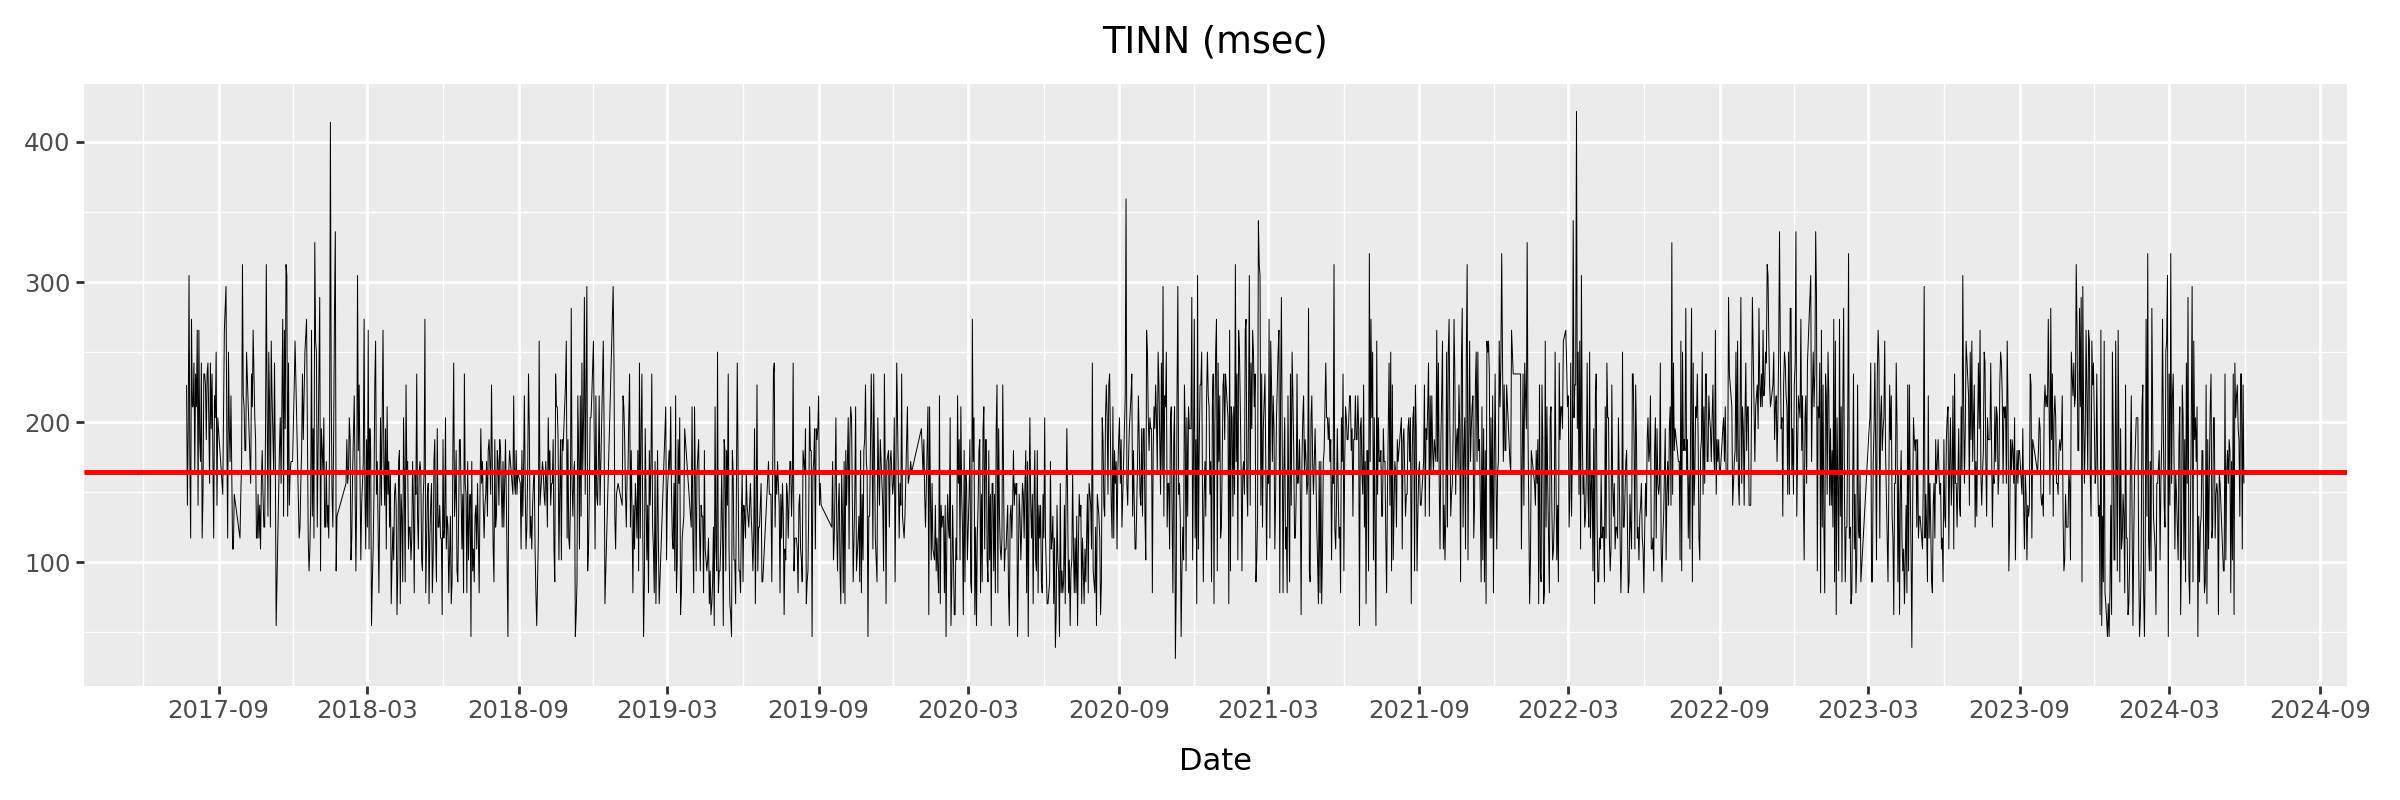

In [445]:
name = "TINN"
unit = "msec"
print(len(df.filter(pl.col(name) > (df[name].std()*5 + df[name].mean()))))
outlier = pl.DataFrame(df.filter(pl.col(name) >= (df[name].std()*5 + df[name].mean())))
(
    ggplot(data=df, mapping=aes(x="date"))
    + geom_line(aes(y=name), size=0.2)
    + geom_hline(aes(yintercept=df[name].mean()), color="red", size=1)
    + geom_point(data=df.filter(pl.col(name) > df[name].std()*5+df[name].mean()), mapping=aes(x="date", y=name), color="green")
    # + ylim(0, 115)
    + labs(title=f"{name} ({unit})", x="Date", y="")
    + theme(figure_size=(12, 4))
    + scale_x_date(
        limits=(
            datetime(year=2017, month=7, day=24),
            datetime(year=2024, month=5, day=31)
        ),
        date_labels="%Y-%m",
        date_breaks="6 month",
    #     # expand=(0, 1),
    #     date_minor_breaks="1 month",
    )
)
# .save(f"../../fig/hrv/{name.lower()}.png", dpi=500)


In [409]:
outlier

date,HR,SDNN,RMSSD,pNN50,TINN
date,f64,f64,f64,f64,f64
2017-12-11,94.727885,53.571299,65.074319,14.440678,179.6875
2018-01-20,91.299262,79.7142,51.5209,18.44,281.25
2018-02-25,95.203452,74.201415,66.083786,24.440179,273.4375
2018-05-13,80.561657,69.470799,96.941756,15.645695,148.4375
2023-11-17,100.728935,66.458654,95.810625,61.347286,296.875


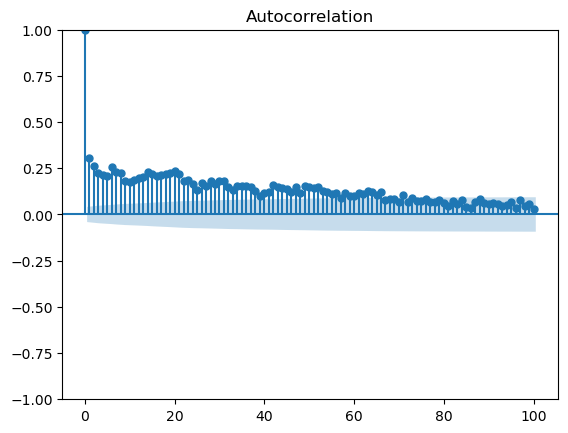

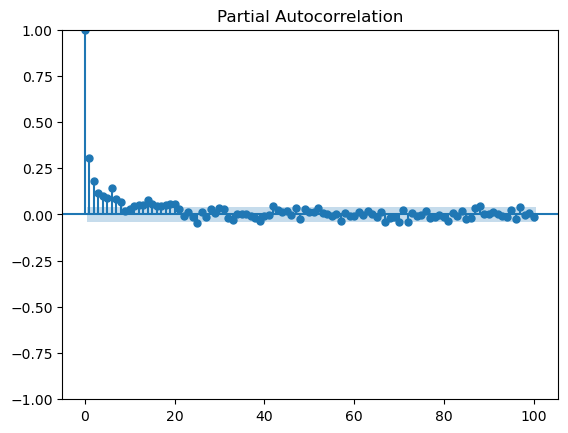

In [410]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
name = "SDNN"
plot_acf(df[name].drop_nulls(), lags=100);
plot_pacf(df[name].drop_nulls(), lags=100);